In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import numpy as np
from snowpack_functions import unpack_netcdf_file_var
# basins = ["cascades","california","northernrockies","southernrockies","whites","plains","nwinterior","coastalnorth","coastalsouth","southwest"]
basins = ["missouri","nwinterior","coastalnorth","coastalsouth","lower_colorado","great_basin"]
scenarios = ["historical","rcp45","rcp85"]
variables=["pr"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']

SPRING PRECIPITATION

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/spring_precip_all.png'


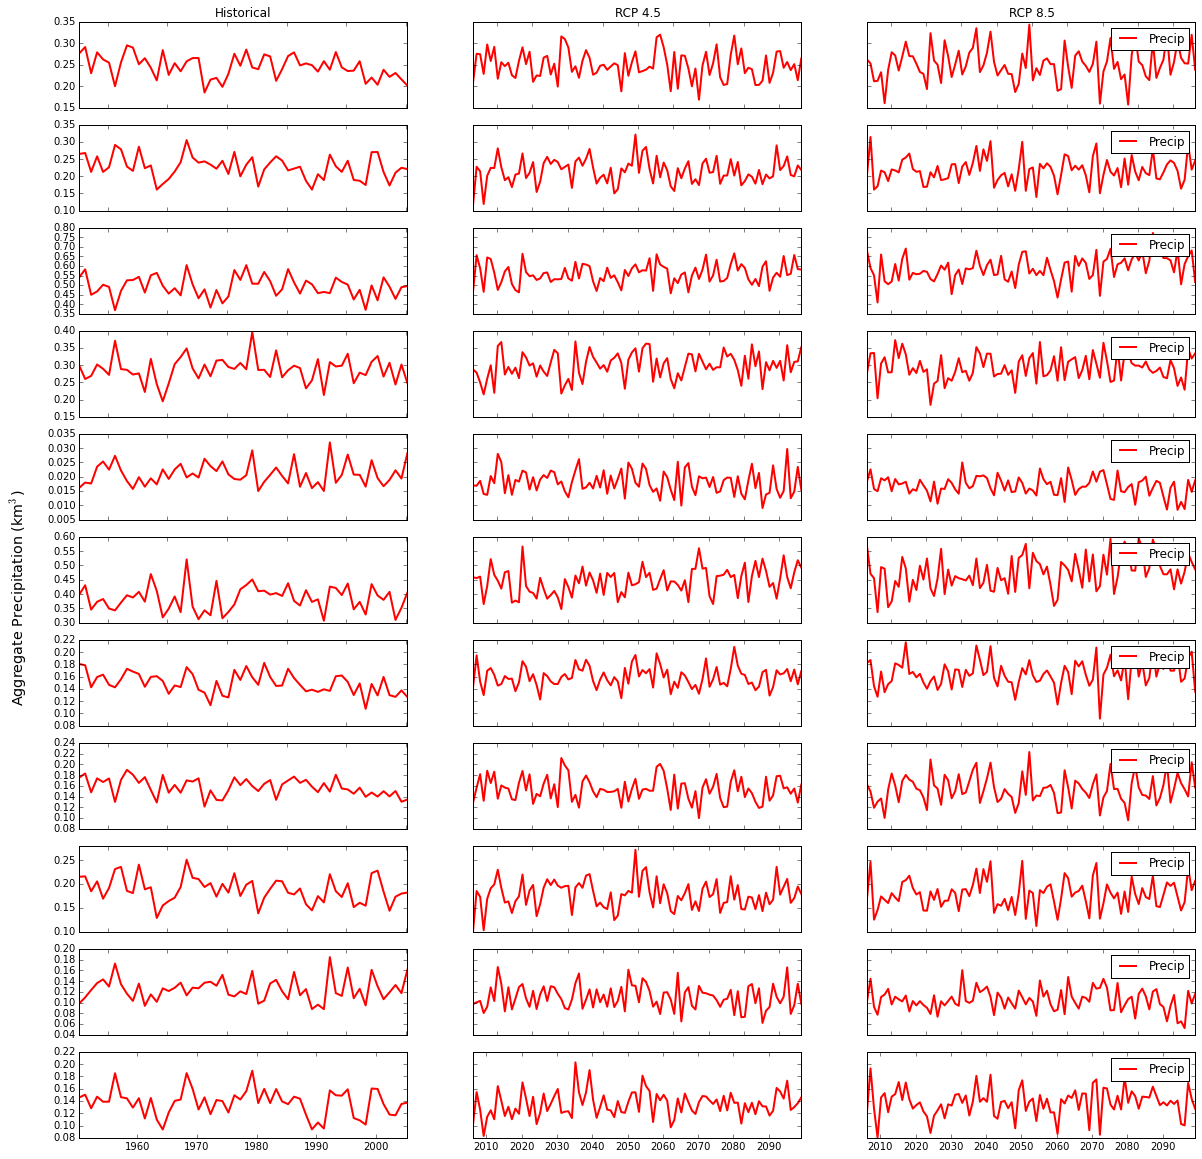

In [13]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]

lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %("whites",scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            
            if (scenario == "historical"):
                ax = fig.add_subplot(11,3,num+1) 
                
            else: 
                ax = fig.add_subplot(11,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "great_basin"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/precip_summer/'
                file = '%s_%s_%s_mam.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            sm_mean = swe_gcms.mean(0)
            
            ax.plot_date(dates,sm_mean,fmt='-',color='r',label='Precip',linewidth=lw)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            #plt.ylim((-8,6))
            
            if (scenario == "rcp85"):
                plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Precipitation (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'spring_precip_all.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

SUMMER PRECIPITATION 

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_precip_all.png'


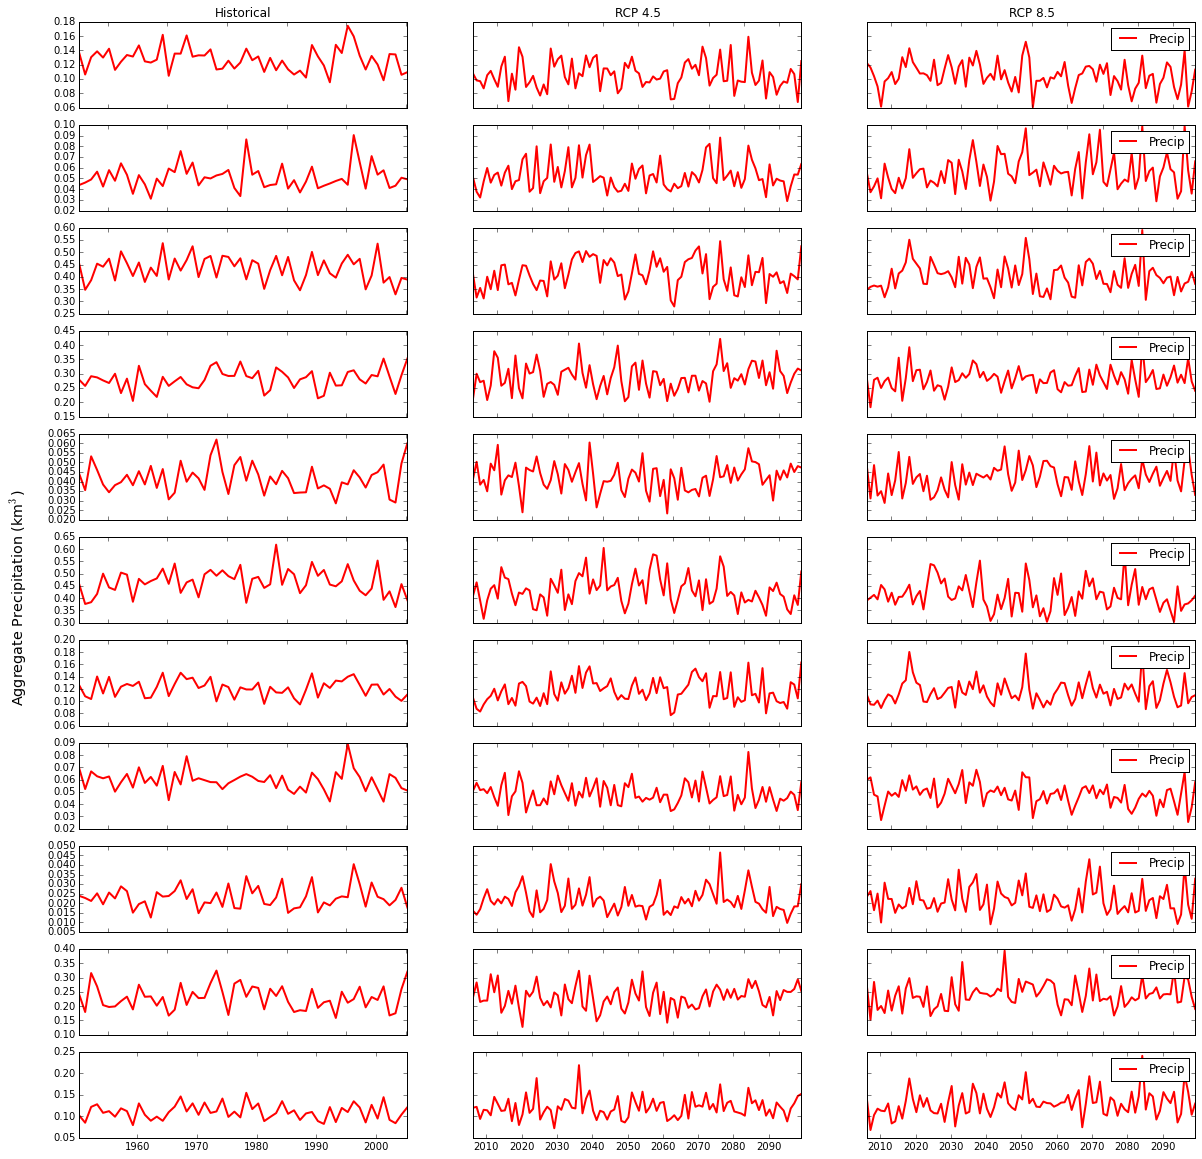

In [14]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]

lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %("whites",scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            
            if (scenario == "historical"):
                ax = fig.add_subplot(11,3,num+1) 
                
            else: 
                ax = fig.add_subplot(11,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "great_basin"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/precip_summer/'
                file = '%s_%s_%s_jja.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            sm_mean = swe_gcms.mean(0)
            
            ax.plot_date(dates,sm_mean,fmt='-',color='r',label='Precip',linewidth=lw)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            #plt.ylim((-8,6))
            
            if (scenario == "rcp85"):
                plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Precipitation (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'summer_precip_all.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

SPRING PRECIPITATION: FULL RANGE OF GCMS

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/spring_precip_all_gcms.png'


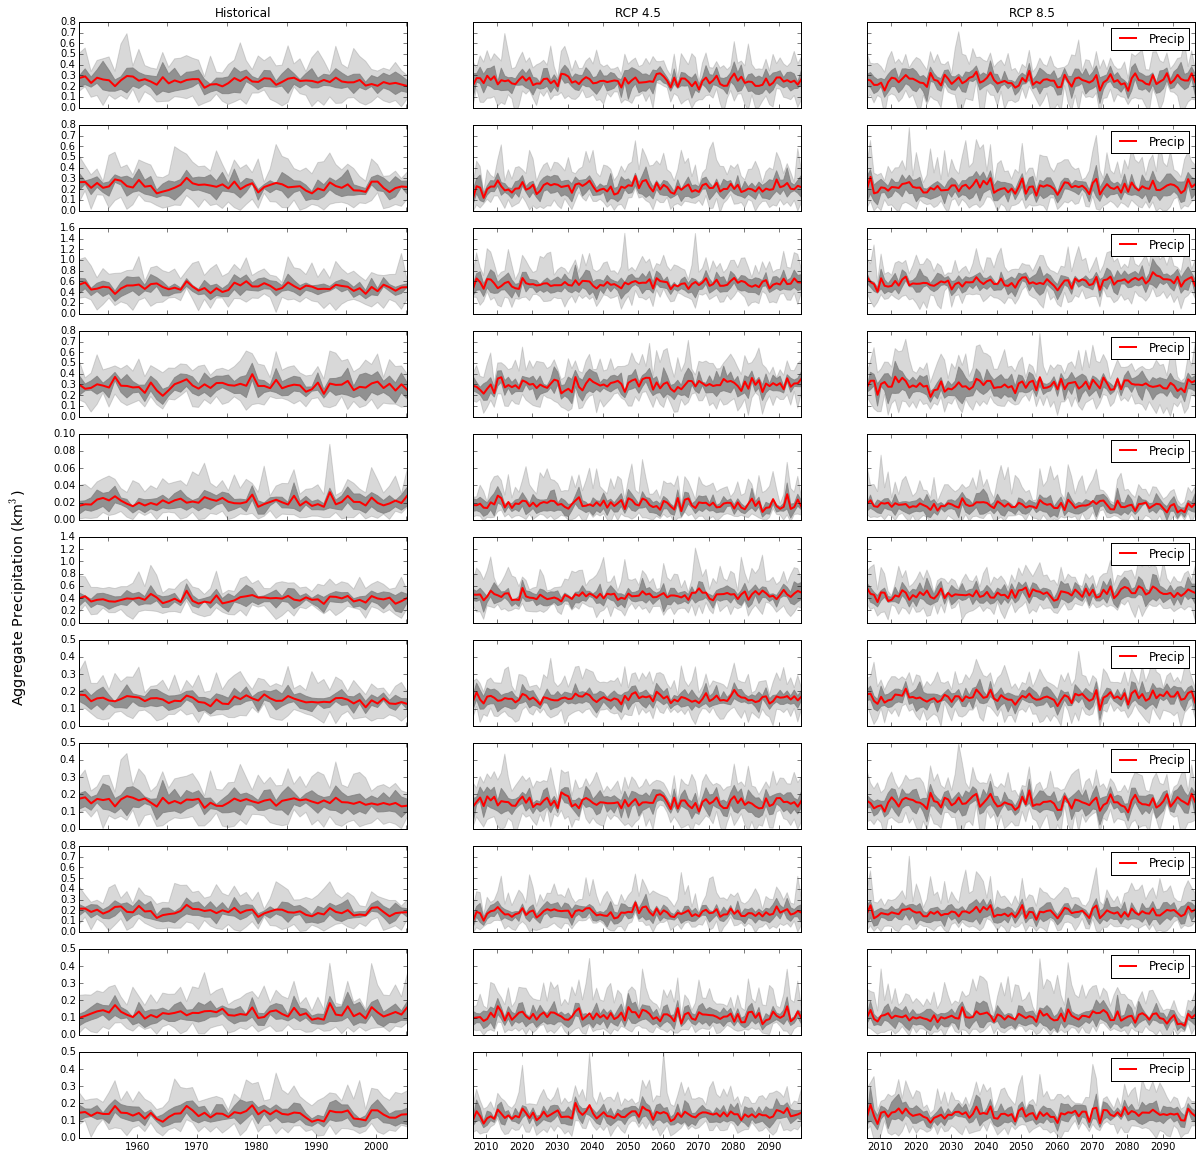

In [15]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]

lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %("whites",scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            
            if (scenario == "historical"):
                ax = fig.add_subplot(11,3,num+1) 
                
            else: 
                ax = fig.add_subplot(11,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "great_basin"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/precip_summer/'
                file = '%s_%s_%s_mam.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            sm_mean = swe_gcms.mean(0)
            
            ax.plot_date(dates,sm_mean,fmt='-',color='r',label='Precip',linewidth=lw)
            ax.fill_between(dates,swe_gcms.min(0),swe_gcms.max(0),color='grey',alpha=0.3)
            ax.fill_between(dates,np.percentile(swe_gcms,25,0),np.percentile(swe_gcms,75,0),color='grey',alpha=0.8)
            
            ax.set_ylim(bottom=0)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            #plt.ylim((-8,6))
            
            if (scenario == "rcp85"):
                plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Precipitation (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'spring_precip_all_gcms.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

SUMMER PRECIPITATION: FULL RANGE OF GCMS

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_precip_all_gcms.png'


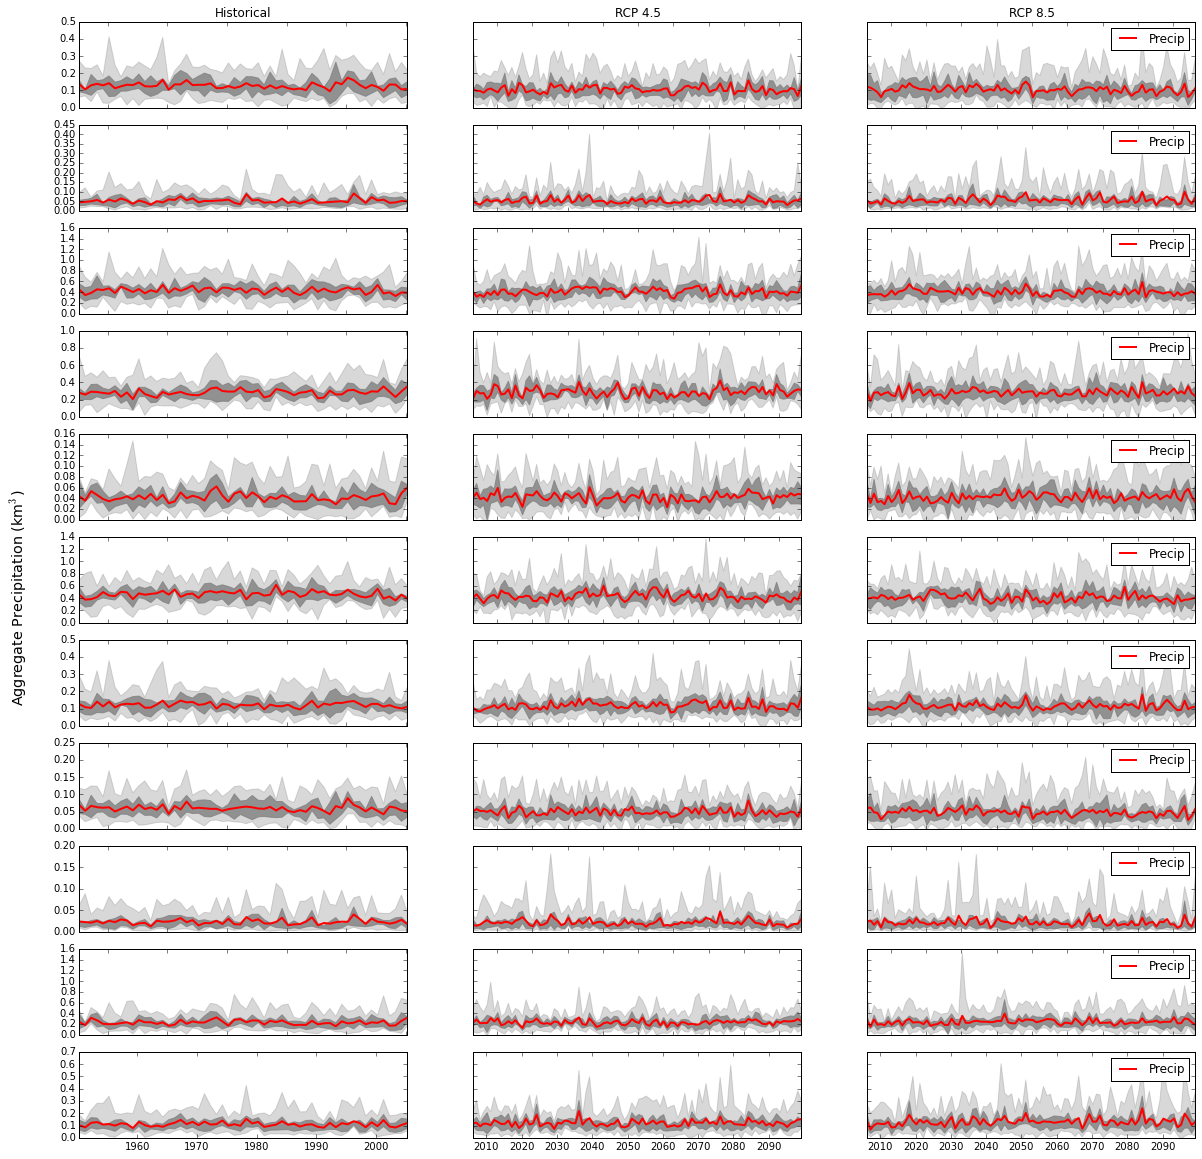

In [16]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]

lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %("whites",scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            
            if (scenario == "historical"):
                ax = fig.add_subplot(11,3,num+1) 
                
            else: 
                ax = fig.add_subplot(11,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "great_basin"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/precip_summer/'
                file = '%s_%s_%s_jja.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            sm_mean = swe_gcms.mean(0)
            
            ax.plot_date(dates,sm_mean,fmt='-',color='r',label='Precip',linewidth=lw)
            ax.fill_between(dates,swe_gcms.min(0),swe_gcms.max(0),color='grey',alpha=0.3)
            ax.fill_between(dates,np.percentile(swe_gcms,25,0),np.percentile(swe_gcms,75,0),color='grey',alpha=0.8)
            
            ax.set_ylim(bottom=0)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            #plt.ylim((-8,6))
            
            if (scenario == "rcp85"):
                plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Precipitation (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'summer_precip_all_gcms.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)